In [199]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [200]:
df=pd.read_csv('Computer_Data.csv')
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25.0,80.0,4,14.0,NaN,no,yes,94,1
1,2,1795,33.0,85.0,2,14.0,NaN,no,yes,94,1
2,3,1595,25.0,170.0,4,15.0,NaN,no,yes,94,1
3,4,1849,25.0,170.0,8,14.0,no,no,no,94,1
4,5,3295,33.0,NaN,16,14.0,no,no,yes,94,1


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6259 non-null   int64  
 1   price       6259 non-null   int64  
 2   speed       6252 non-null   float64
 3   hd          6257 non-null   float64
 4   ram         6259 non-null   int64  
 5   screen      6255 non-null   float64
 6   cd          6252 non-null   object 
 7   multi       6259 non-null   object 
 8   premium     6254 non-null   object 
 9   ads         6259 non-null   int64  
 10  trend       6259 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 538.0+ KB


In [202]:
df.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6252.000000,6257.000000,6259.000000,6255.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.008317,416.626179,8.286947,14.608793,221.301007,15.926985
std,1806.961999,580.803956,21.165948,258.586142,5.631099,0.905312,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [203]:
# 1)Handling missing values
print(df.isnull().sum(), '\n'*2)
print(df.isnull().any())

Unnamed: 0    0
price         0
speed         7
hd            2
ram           0
screen        4
cd            7
multi         0
premium       5
ads           0
trend         0
dtype: int64 


Unnamed: 0    False
price         False
speed          True
hd             True
ram           False
screen         True
cd             True
multi         False
premium        True
ads           False
trend         False
dtype: bool


<AxesSubplot:ylabel='speed'>

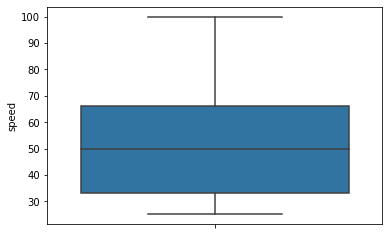

In [204]:
sns.boxplot(y='speed', data=df)

<AxesSubplot:ylabel='hd'>

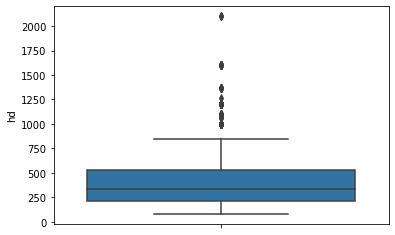

In [205]:
sns.boxplot(y='hd', data=df)

<AxesSubplot:ylabel='screen'>

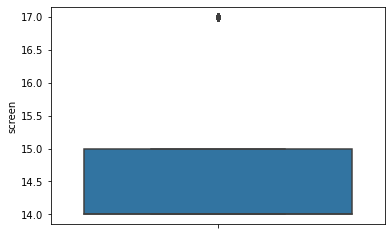

In [206]:
sns.boxplot(y='screen', data=df)

<AxesSubplot:ylabel='ram'>

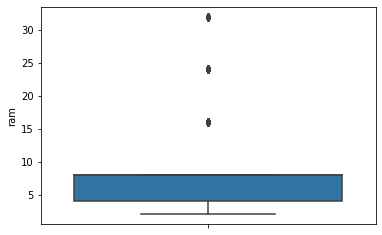

In [207]:
sns.boxplot(y='ram', data=df)

<AxesSubplot:ylabel='ads'>

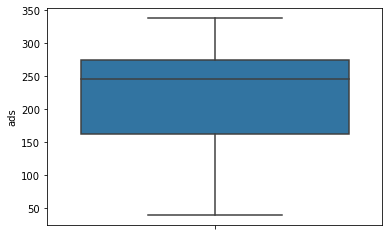

In [208]:
sns.boxplot(y='ads', data=df)

<AxesSubplot:ylabel='trend'>

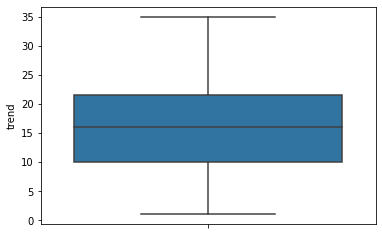

In [209]:
sns.boxplot(y='trend', data=df)

In [210]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [211]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25.0,80.0,4,14.0,NaN,no,yes,94,1
1,1795,33.0,85.0,2,14.0,NaN,no,yes,94,1
2,1595,25.0,170.0,4,15.0,NaN,no,yes,94,1
3,1849,25.0,170.0,8,14.0,no,no,no,94,1
4,3295,33.0,NaN,16,14.0,no,no,yes,94,1


In [212]:
df['speed']=df['speed'].fillna(df['speed'].mean())
df['hd']=df['hd'].fillna(df['hd'].median())
df['screen']=df['screen'].fillna(df['screen'].median())

In [213]:
df['cd'].value_counts()

no     3344
yes    2908
Name: cd, dtype: int64

In [214]:
df['premium'].value_counts()

yes    5642
no      612
Name: premium, dtype: int64

In [215]:
df['cd']=df['cd'].fillna(df['cd'].mode()[0])
df['premium']=df['premium'].fillna(df['premium'].mode()[0])

In [216]:
print(df.isnull().sum())


price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64


In [217]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25.0,80.0,4,14.0,no,no,yes,94,1
1,1795,33.0,85.0,2,14.0,no,no,yes,94,1
2,1595,25.0,170.0,4,15.0,no,no,yes,94,1
3,1849,25.0,170.0,8,14.0,no,no,no,94,1
4,3295,33.0,340.0,16,14.0,no,no,yes,94,1


In [218]:
df.shape

(6259, 10)

In [219]:
# 2)outlier treatment

In [220]:
df.loc[:, ['speed','hd','ram','screen','ads','trend']]=np.sqrt(df.loc[:, ['speed','hd','ram','screen','ads','trend']])

In [221]:
df

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,5.000000,8.944272,2.000000,3.741657,no,no,yes,9.695360,1.00000
1,1795,5.744563,9.219544,1.414214,3.741657,no,no,yes,9.695360,1.00000
2,1595,5.000000,13.038405,2.000000,3.872983,no,no,yes,9.695360,1.00000
3,1849,5.000000,13.038405,2.828427,3.741657,no,no,no,9.695360,1.00000
4,3295,5.744563,18.439089,4.000000,3.741657,no,no,yes,9.695360,1.00000
...,...,...,...,...,...,...,...,...,...,...
6254,1690,10.000000,22.978251,2.828427,3.872983,no,no,yes,6.244998,5.91608
6255,2223,8.124038,29.154759,4.000000,3.872983,yes,yes,yes,6.244998,5.91608
6256,2654,10.000000,34.641016,4.898979,3.872983,yes,no,yes,6.244998,5.91608
6257,2195,10.000000,29.154759,4.000000,3.872983,yes,no,yes,6.244998,5.91608


In [222]:
# 3) Encoding concept

df=pd.get_dummies(df, columns=['cd','multi','premium'],drop_first=True)

In [223]:
df

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,5.000000,8.944272,2.000000,3.741657,9.695360,1.00000,0,0,1
1,1795,5.744563,9.219544,1.414214,3.741657,9.695360,1.00000,0,0,1
2,1595,5.000000,13.038405,2.000000,3.872983,9.695360,1.00000,0,0,1
3,1849,5.000000,13.038405,2.828427,3.741657,9.695360,1.00000,0,0,0
4,3295,5.744563,18.439089,4.000000,3.741657,9.695360,1.00000,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,10.000000,22.978251,2.828427,3.872983,6.244998,5.91608,0,0,1
6255,2223,8.124038,29.154759,4.000000,3.872983,6.244998,5.91608,1,1,1
6256,2654,10.000000,34.641016,4.898979,3.872983,6.244998,5.91608,1,0,1
6257,2195,10.000000,29.154759,4.000000,3.872983,6.244998,5.91608,1,0,1


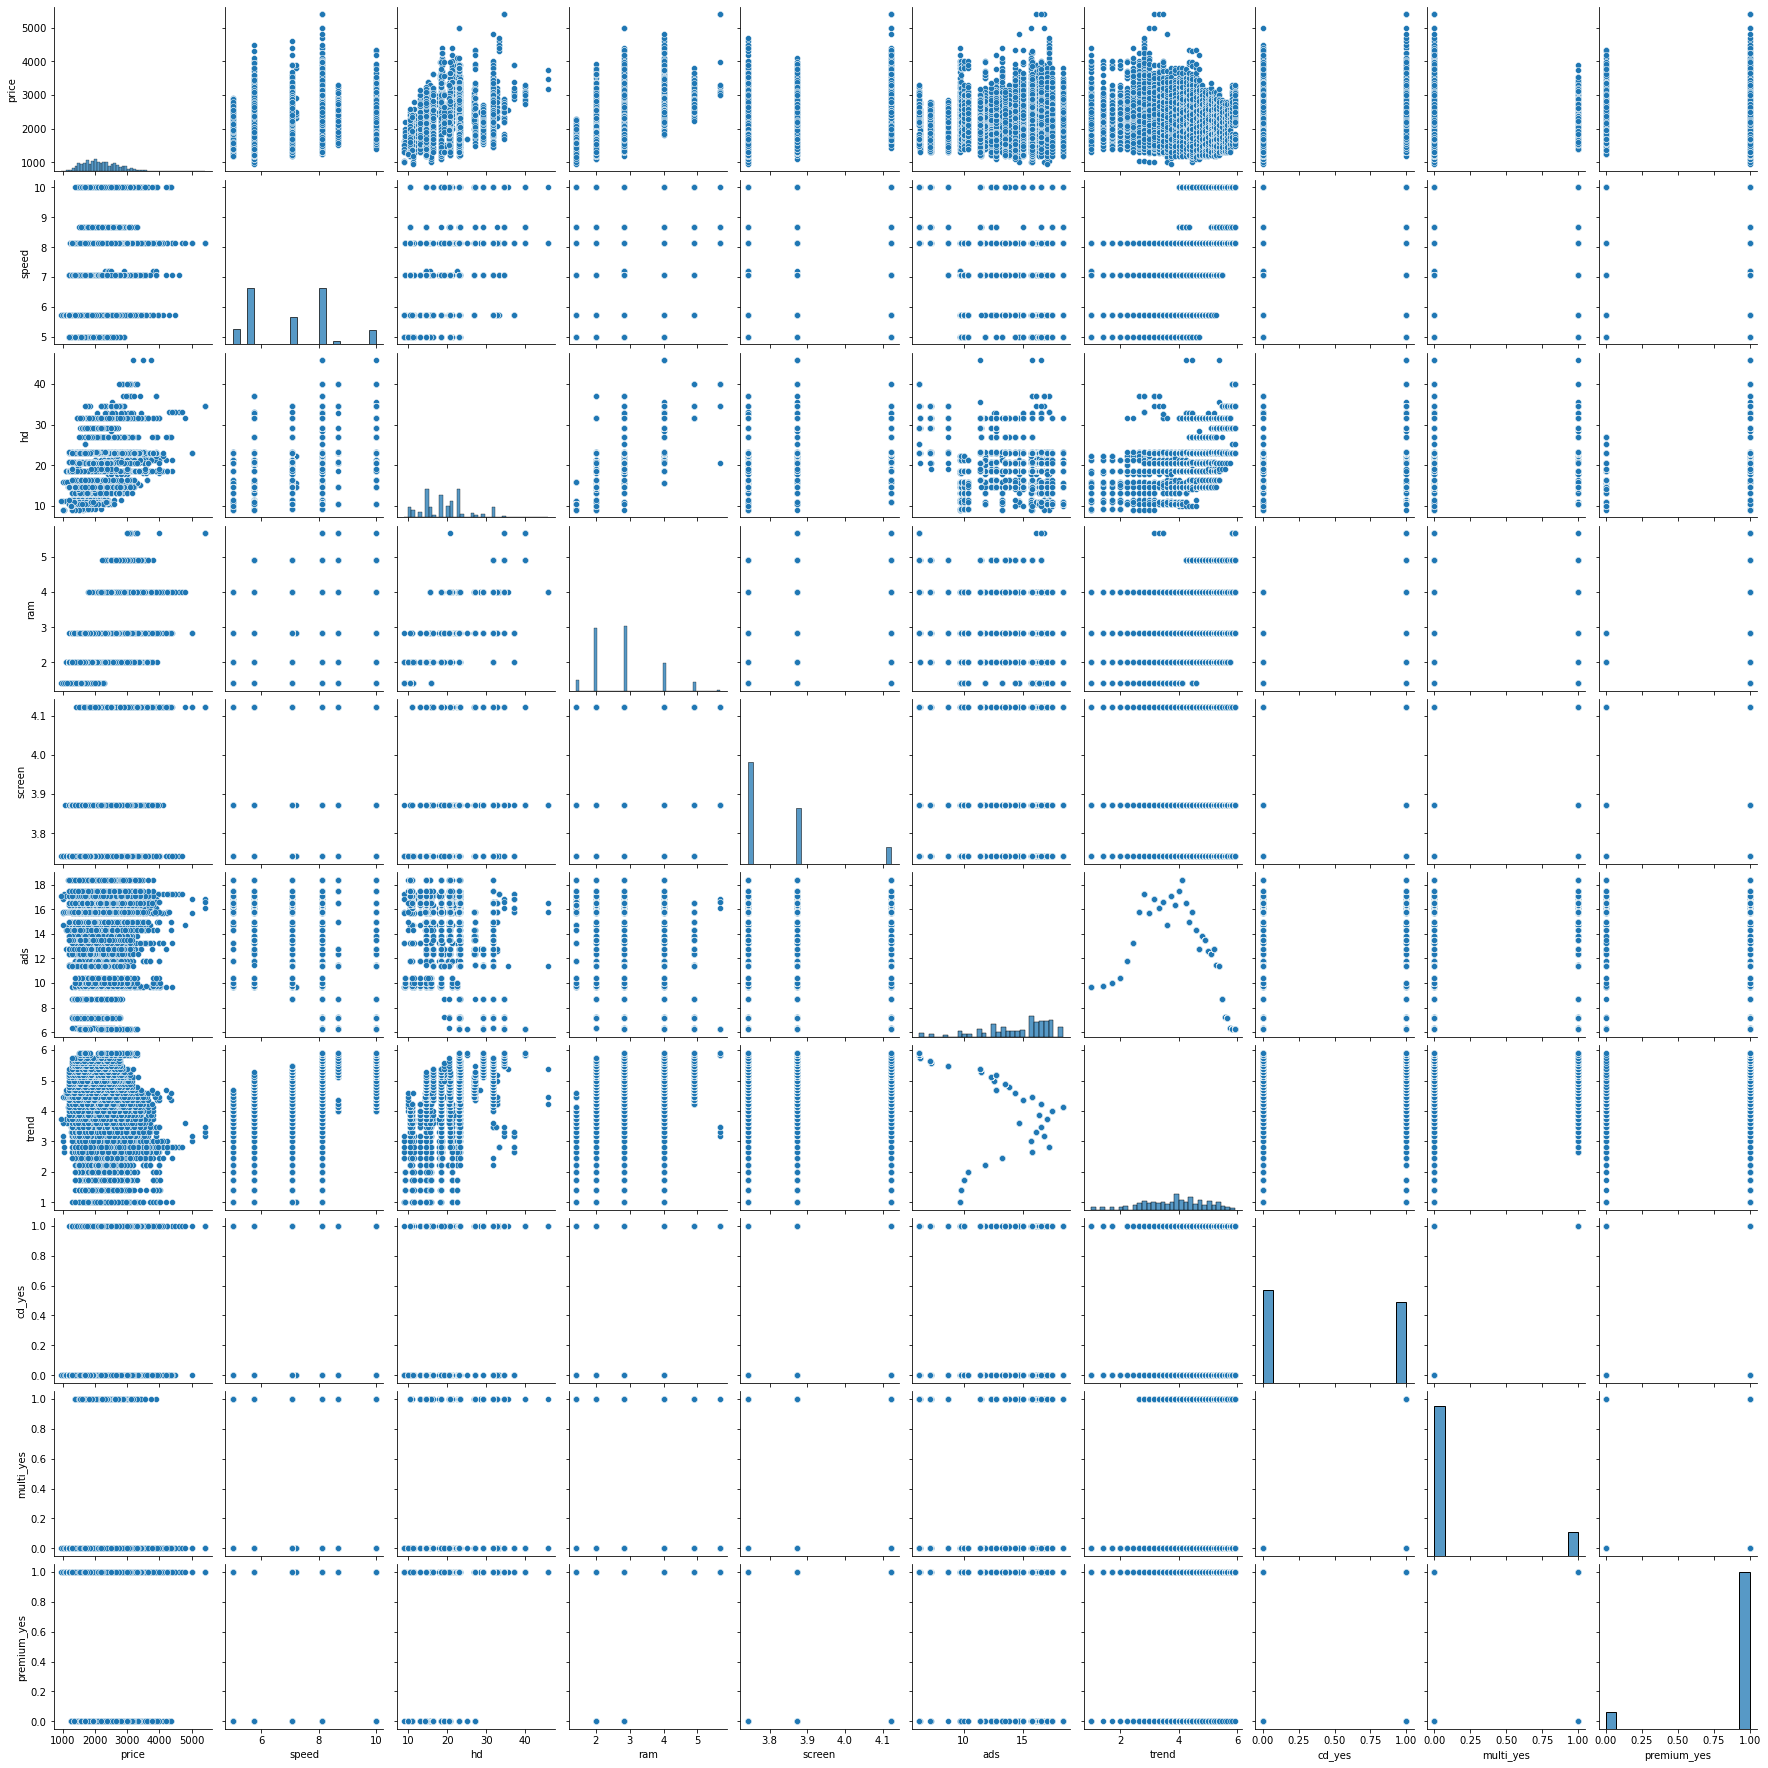

In [224]:
sns.pairplot(df)

In [225]:
df.corr()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
price,1.000000,0.312506,0.451807,0.641025,0.296999,0.052388,-0.198924,0.197343,-0.016651,-0.080696
speed,0.312506,1.000000,0.393091,0.257307,0.199523,-0.236959,0.366569,0.256423,0.087004,0.121311
hd,0.451807,0.393091,1.000000,0.793245,0.252945,-0.308714,0.555552,0.521983,0.106373,0.211036
ram,0.641025,0.257307,0.793245,1.000000,0.224941,-0.188225,0.253350,0.456581,0.054625,0.200320
screen,0.296999,0.199523,0.252945,0.224941,1.000000,-0.093739,0.181094,0.131850,-0.000917,0.020118
ads,0.052388,-0.236959,-0.308714,-0.188225,-0.093739,1.000000,-0.175894,-0.061690,-0.026265,-0.148730
trend,-0.198924,0.366569,0.555552,0.253350,0.181094,-0.175894,1.000000,0.450107,0.215766,0.015253
cd_yes,0.197343,0.256423,0.521983,0.456581,0.131850,-0.061690,0.450107,1.000000,0.432179,0.216077
multi_yes,-0.016651,0.087004,0.106373,0.054625,-0.000917,-0.026265,0.215766,0.432179,1.000000,0.124775
premium_yes,-0.080696,0.121311,0.211036,0.200320,0.020118,-0.148730,0.015253,0.216077,0.124775,1.000000


<AxesSubplot:>

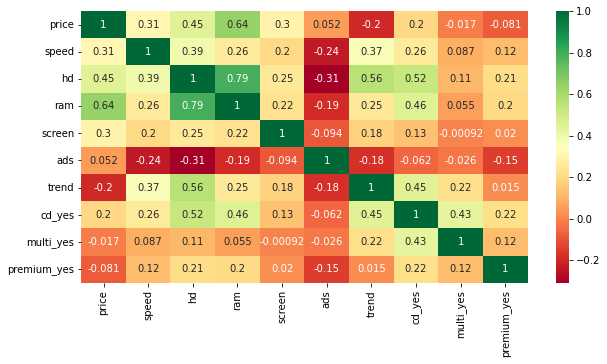

In [226]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

In [227]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

C:\Users\hp\AppData\Local\Temp\ipykernel_368\2896054759.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X, y)


ExtraTreesRegressor()

In [228]:
print(selection.feature_importances_)

[0.09849865 0.13918926 0.39561707 0.06055052 0.04079229 0.17129533
 0.01954179 0.00678439 0.0677307 ]


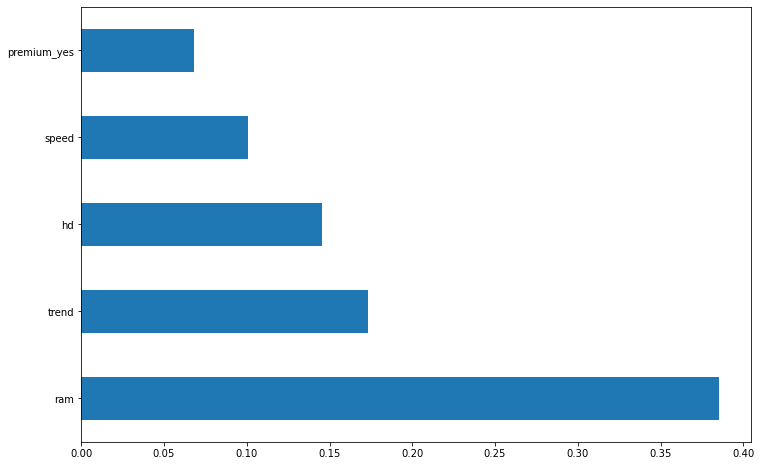

In [198]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [155]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_yes',
       'multi_yes', 'premium_yes'],
      dtype='object')

In [158]:
# splitting the data into independent variable and dependent variable
X=df.loc[:, ['speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_yes','multi_yes', 'premium_yes']]
y=df.loc[:, ['price']]

In [159]:
X

,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,5.000000,8.944272,2.000000,3.741657,9.695360,1.00000,0,0,1
1,5.744563,9.219544,1.414214,3.741657,9.695360,1.00000,0,0,1
2,5.000000,13.038405,2.000000,3.872983,9.695360,1.00000,0,0,1
3,5.000000,13.038405,2.828427,3.741657,9.695360,1.00000,0,0,0
4,5.744563,18.439089,4.000000,3.741657,9.695360,1.00000,0,0,1
...,...,...,...,...,...,...,...,...,...
6254,10.000000,22.978251,2.828427,3.872983,6.244998,5.91608,0,0,1
6255,8.124038,29.154759,4.000000,3.872983,6.244998,5.91608,1,1,1
6256,10.000000,34.641016,4.898979,3.872983,6.244998,5.91608,1,0,1
6257,10.000000,29.154759,4.000000,3.872983,6.244998,5.91608,1,0,1


In [160]:
# pre-processing part 4 - feature scaling (Independent variable)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

In [163]:
X_sc=pd.DataFrame(X_sc,columns=X.columns)
X_sc

,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,-1.434748,-1.769155,-0.819751,-0.680264,-1.750289,-2.673733,-0.931558,-0.402600,0.329205
1,-0.917781,-1.723090,-1.472757,-0.680264,-1.750289,-2.673733,-0.931558,-0.402600,0.329205
2,-1.434748,-1.084039,-0.819751,0.455087,-1.750289,-2.673733,-0.931558,-0.402600,0.329205
3,-1.434748,-1.084039,0.103740,-0.680264,-1.750289,-2.673733,-0.931558,-0.402600,-3.037618
4,-0.917781,-0.180284,1.409753,-0.680264,-1.750289,-2.673733,-0.931558,-0.402600,0.329205
...,...,...,...,...,...,...,...,...,...
6254,2.036867,0.579303,0.103740,0.455087,-2.979366,1.944347,-0.931558,-0.402600,0.329205
6255,0.734344,1.612886,1.409753,0.455087,-2.979366,1.944347,1.073470,2.483854,0.329205
6256,2.036867,2.530961,2.411891,0.455087,-2.979366,1.944347,1.073470,-0.402600,0.329205
6257,2.036867,1.612886,1.409753,0.455087,-2.979366,1.944347,1.073470,-0.402600,0.329205


In [164]:
# Split the data into training and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4694, 9)
(1565, 9)
(4694, 1)
(1565, 1)


In [165]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [166]:
model.coef_

array([[ 128.47280426,   37.19167989,  302.78892582,  850.58742629,
          40.49931644, -362.07021138,   26.18664088,  102.28226384,
        -524.9538222 ]])

In [167]:
model.intercept_

array([-2244.14213713])

In [168]:
model.score(X_train, y_train)

0.7896788944355593

In [169]:
model.score(X_test, y_test)

0.7782539658319694

In [170]:
y_pred=model.predict(X_test)
y_pred

array([[2532.01407515],
       [2124.96451963],
       [2233.57898892],
       ...,
       [2052.54996521],
       [1837.513479  ],
       [2466.58941188]])

In [172]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.7782539658319694

In [173]:
# Regression Model Evaluation by "OLS" Methods

In [184]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [187]:
reg_model = smf.OLS(endog = y_train, exog = X_train).fit()

In [188]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          3.559e+04
Date:                Fri, 16 Sep 2022   Prob (F-statistic):                        0.00
Time:                        11:46:10   Log-Likelihood:                         -33045.
No. Observations:                4694   AIC:                                  6.611e+04
Df Residuals:                    4685   BIC:                                  6.617e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
speed         127.4664      3.181     40.067      0.000     121.229     133.703
hd             37.8654      1.450     26.108      0.000      35.022      40.709
ram           304.8188      8.025     37.983      0.000     289.086     320.552
screen        290.7150     10.688     27.200      0.000     269.761     311.669
ads            34.7664      1.514     22.965      0.000      31.798      37.734
trend        -365.3592      5.282    -69.176      0.000    -375.714    -355.005
cd_yes         44.1263     11.072      3.986      0.000      22.421      65.832
multi_yes      91.6282     13.138      6.974      0.000      65.871     117.386
premium_yes  -553.2271     14.336    -38.590      0.000    -581.333    -525.121
==============================================================================
Omnibus:                      735.661   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2072.443
Skew:                           0.836   Prob(JB):                         0.00
Kurtosis:                       5.793   Cond. No.                         103.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
import statsmodels.api as sm

In [182]:
result = sm.OLS(y,X).fit()

In [183]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          4.723e+04
Date:                Fri, 16 Sep 2022   Prob (F-statistic):                        0.00
Time:                        11:44:59   Log-Likelihood:                         -44063.
No. Observations:                6259   AIC:                                  8.814e+04
Df Residuals:                    6250   BIC:                                  8.820e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------